In [3]:
# load data
import numpy as np
import pandas as pd

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data"

names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
         'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 
         'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30',
         'a31', 'a32', 'a33', 'a34', 'class']


df = pd.read_csv(url, names=names)

In [4]:
df.head(5)

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [5]:
df.shape

(351, 35)

In [6]:
df_1 = df["class"].replace(['g', 'b'], ['1', '0'])

In [8]:
df_1.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: object

In [9]:
df["class"].replace(['g', 'b'], ['1', '0'], inplace=True)

In [10]:
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [11]:
from sklearn.cross_validation import train_test_split

X = df.iloc[:, 0:34]
y = df.iloc[:, 34]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

D:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

estimator.fit(X_train, y_train)

y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100

print("The accuracy is {0:.2f}%".format(accuracy))

The accuracy is 86.36%


In [13]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = scores.mean()*100

print("The average accuracy is {0:.2f}%".format(average_accuracy))

The average accuracy is 82.34%


In [14]:
# setting parameters

avg_scores = []
all_scores = []
parameter_values = list(range(1, 21))
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(scores.mean())
    all_scores.append(scores)

In [15]:
%matplotlib inline

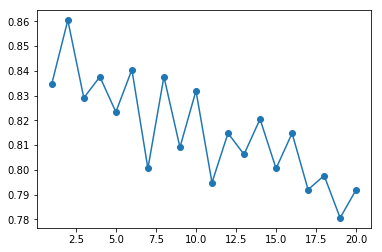

In [16]:
from matplotlib import pyplot as plt

plt.plot(parameter_values, avg_scores, '-o')

In [25]:
# Grid search for algorithm tuning
from sklearn.model_selection import GridSearchCV

X = df.iloc[:, 0:34]
y = df.iloc[:, 34]

metrics = ['minkowski', 'euclidean', 'manhattan']
weights = ['uniform', 'distance']

num_neighbors = np.arange(1,21)
param_grid = dict(metric=metrics, weights=weights, n_neighbors=num_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)

0.88603988604
2


param_grid 参数设置 需 根据具体 算法进行设置